In [1]:
# --------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# --------------------------------------------------
# 2. Load and Explore the Dataset
# --------------------------------------------------
# Load the data from the 'data' folder
dataset = pd.read_csv('../data/Social_Network_Ads.csv')

print("First 5 rows of the dataset:")
print(dataset.head())

print("\nDataset Info:")
dataset.info()

print("\nDescriptive Statistics:")
print(dataset.describe())

# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

# For this model, we'll use Age and EstimatedSalary to predict Purchase
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Descriptive Statistics:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07  

In [3]:
# --------------------------------------------------
# 3. Data Preprocessing
# --------------------------------------------------
# Split the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling (Crucial for distance-based algorithms like KNN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (300, 2)
Shape of X_test: (100, 2)


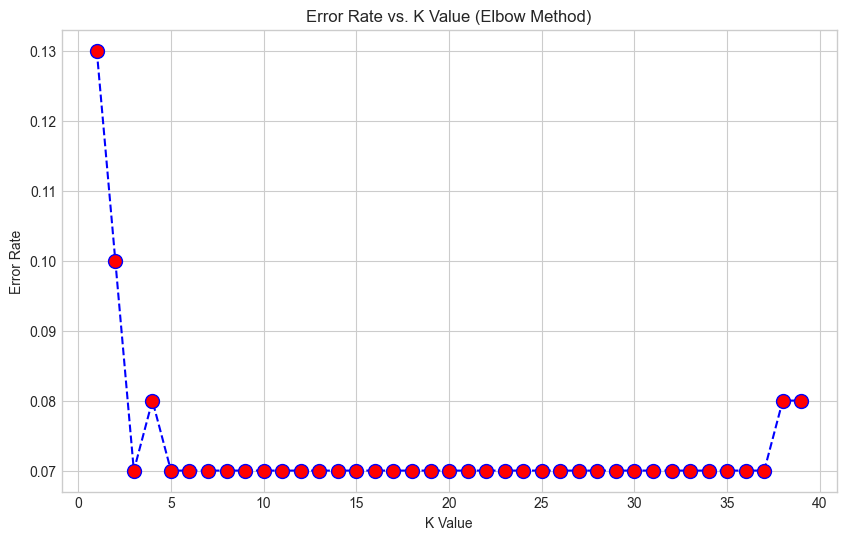

In [4]:
# --------------------------------------------------
# 4. Find the Optimal K Value (The Elbow Method)
# This is an "Above and Beyond" step to systematically find the best K.
# --------------------------------------------------
error_rate = []

# Will take some time to run
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value (Elbow Method)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.savefig('../visualizations/elbow_method.png')
plt.show()

# From the plot, K=5 seems to be a good value where the error rate is low and stable.

In [5]:
# --------------------------------------------------
# 5. Train the KNN Model with the Optimal K
# --------------------------------------------------
# We choose K=5 based on the Elbow Method plot
optimal_k = 5
classifier = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=2) # p=2 is for Euclidean distance
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

Accuracy: 93.00%

Confusion Matrix:
[[64  4]
 [ 3 29]]


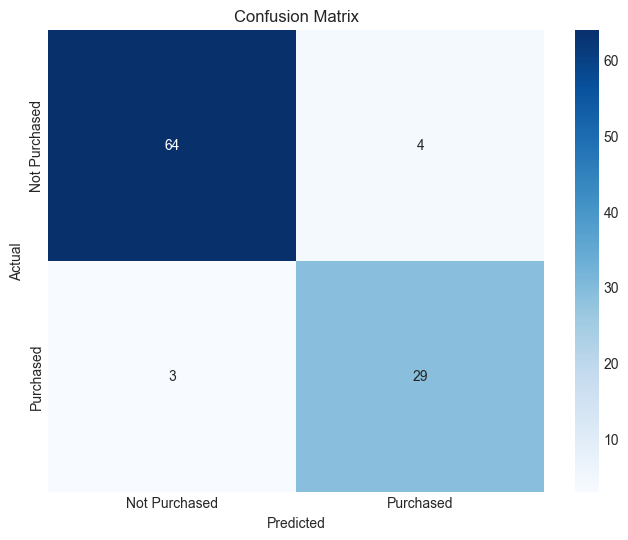


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [6]:
# --------------------------------------------------
# 6. Evaluate the Model's Performance
# --------------------------------------------------
# a) Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# b) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plotting the Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../visualizations/confusion_matrix.png')
plt.show()


# c) Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\ketaki\AppData\Local\Temp\ipykernel_42168\2851816051.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


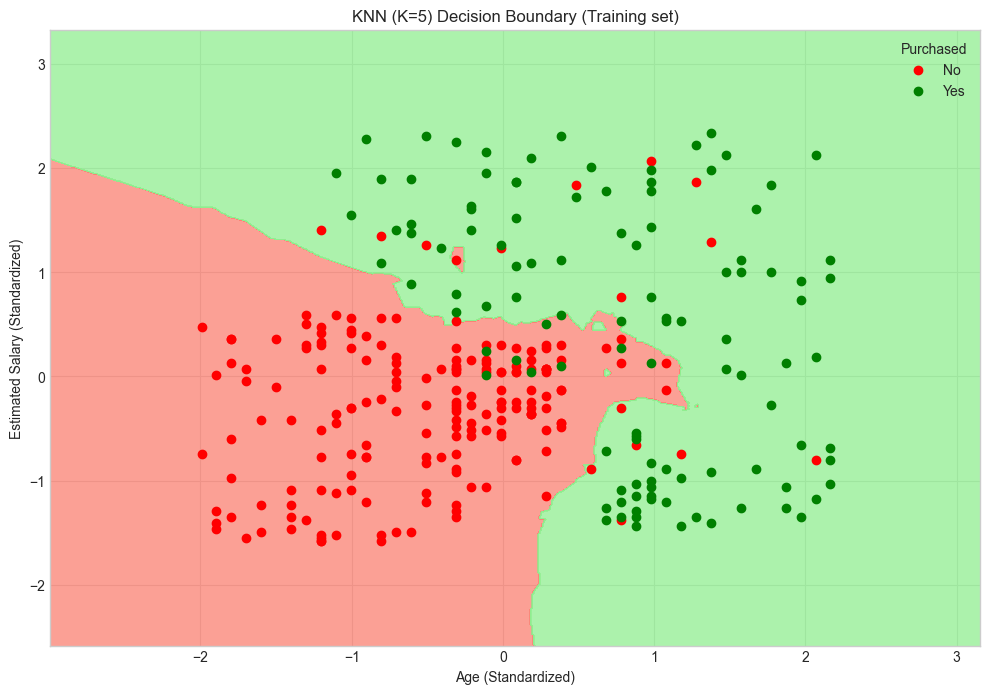

In [7]:
# --------------------------------------------------
# 7. Visualize the Decision Boundaries (Key Requirement)
# --------------------------------------------------
# This code creates a visual map of how the model makes predictions

# Create a meshgrid for the plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title(f'KNN (K={optimal_k}) Decision Boundary (Training set)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Estimated Salary (Standardized)')
plt.legend(title="Purchased", labels=['No', 'Yes'])
plt.savefig('../visualizations/knn_decision_boundary.png')
plt.show()